# Importação de dependencias

In [62]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd

# Obter dados através da api da Info Dengue
Documentação: [Tutorial da API](https://info.dengue.mat.br/services/tutorial/Python)


In [63]:
url = "https://info.dengue.mat.br/api/alertcity"
geocode = 2304400
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2015
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start="
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"
)

url_resp = "?".join([url, params])

In [64]:
dados = pd.read_csv(url_resp, index_col='SE')

# Ler os dados metereologicos pelo site INMET (Instituto nacional de metereologia)
[Link](https://portal.inmet.gov.br/dadoshistoricos)

In [65]:
df = pd.read_csv('./data/FORTALEZA_2015_2024.CSV', encoding='latin1' ,sep=";", decimal=',')

## Limpeza e tratamento de dados

### Substituindo -9999 por np.nan em todo o DataFrame



In [66]:
df = df.replace(-9999, np.nan)

### Formatar Data e criamos uma ramificação só pegando os valores Mensal


In [67]:
df['Data'] = pd.to_datetime(df['Data'],format='%d/%m/%Y')
df.set_index('Data', inplace=True)

#### Condições

In [68]:
condicoes={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':"sum",
'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':"mean",
'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)':"mean",
'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)':"mean",
'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)':"mean",
'TEMPERATURA DO PONTO DE ORVALHO (°C)':"mean",
'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':"mean",
'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)':"mean",
'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)':"mean",
'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)':"mean",
'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)':"mean",
'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':"mean",
}


#### Colunas para remover

In [97]:
columns_to_drop_mensal_sem_vento = ['Hora UTC', 'RADIACAO GLOBAL (Kj/m²)',
                   'UMIDADE RELATIVA DO AR, HORARIA (%)',
                   'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
                   'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)']

df1 = df.copy()

#### Agrupar o dataframe com suas condições

In [70]:
df1 = df1.resample('W').agg(condicoes)

#### Arredondamento

In [71]:
for coluna in df1.columns:
  df1[coluna]=df1[coluna].round(2)

In [72]:
df1['data_iniSE']=df1.index

### Transformar as datas em string

In [73]:
df1['data_iniSE']=df1['data_iniSE'].astype(str)

# Obter informações sobre o DataFrame

In [74]:
df1.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),data_iniSE
Data,,,,,,,,,,,,,
2015-01-04,54.6,1010.03,1010.28,1009.78,26.45,21.31,26.90,26.07,21.67,20.97,76.16,72.23,2015-01-04
2015-01-11,12.2,1010.34,1010.57,1010.12,27.17,21.27,27.61,26.75,21.72,20.83,73.32,68.60,2015-01-11
2015-01-18,4.8,1009.91,1010.16,1009.67,27.84,21.10,28.26,27.45,21.58,20.67,69.99,65.29,2015-01-18
2015-01-25,3.4,1009.30,1009.52,1009.06,27.79,21.08,28.24,27.38,21.52,20.61,69.74,65.13,2015-01-25
2015-02-01,0.6,1009.20,1009.43,1008.97,27.76,20.92,28.30,27.32,21.38,20.46,69.71,64.88,2015-02-01


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 2015-01-04 to 2025-01-05
Freq: W-SUN
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       523 non-null    float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  493 non-null    float64
 2   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        493 non-null    float64
 3   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       493 non-null    float64
 4   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           493 non-null    float64
 5   TEMPERATURA DO PONTO DE ORVALHO (°C)                   493 non-null    float64
 6   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             493 non-null    float64
 7   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             493 non-null    float64
 8   TEMPERATURA ORVALHO

In [76]:
df1.columns

Index(['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'data_iniSE'],
      dtype='object')

# Realizar o cruzamento dos dados e limpeza dos dados

In [77]:
cruzamento_dados=df1.merge(dados[['data_iniSE','nivel', 'casos','umidmax', 'tempmax',]],on='data_iniSE',how='left')

In [78]:
cruzamento_dados.dropna(inplace=True)

In [79]:
cruzamento_dados['data_iniSE'] = pd.to_datetime(cruzamento_dados['data_iniSE'],format='%Y-%m-%d')

In [80]:
cruzamento_dados['dia'] = cruzamento_dados['data_iniSE'].dt.day
cruzamento_dados['mes'] = cruzamento_dados['data_iniSE'].dt.month

# Obter informações do cruzamento

In [81]:
cruzamento_dados['nivel'].value_counts()

1.0    274
2.0     85
3.0     76
4.0     42
Name: nivel, dtype: int64

In [82]:
cruzamento_dados.columns

Index(['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'data_iniSE', 'nivel',
       'casos', 'umidmax', 'tempmax', 'dia', 'mes'],
      dtype='object')

## Iniciar os testes

In [103]:
X = cruzamento_dados[[
   'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
   'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
      'dia',
     'mes'
]]

## Criar lags dsa variáveis


In [104]:
met_vars = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'mes',
    'dia'
]
for var in met_vars:
    for lag in [1,2,3,4]:
        cruzamento_dados[f'{var}_lag{lag}'] = cruzamento_dados[var].shift(lag)

### Limpar dados vazios

In [105]:
cruzamento_dados.dropna(inplace=True)

In [106]:
def is_met_var(var_name):
    for met in met_vars:
        if var_name == met or var_name.startswith(met + "_lag"):
            return True
    return False
features = [c for c in cruzamento_dados.columns if is_met_var(c)]
X = cruzamento_dados[features]
y = cruzamento_dados['nivel']

In [107]:
n = len(cruzamento_dados)
n_train = int(0.7 * n)
X_train = X.iloc[:n_train]
X_test  = X.iloc[n_train:]
y_train = y.iloc[:n_train]
y_test  = y.iloc[n_train:]

# Árvore de decição de classificação

In [108]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
resultado = decision_tree.predict(X_test)

In [110]:
metrics.recall_score(y_test, resultado, average="micro")

0.5319148936170213

In [111]:
print(classification_report(y_test, resultado))

              precision    recall  f1-score   support

         1.0       0.87      0.76      0.81        78
         2.0       0.24      0.23      0.24        26
         3.0       0.27      0.32      0.29        25
         4.0       0.11      0.17      0.13        12

    accuracy                           0.53       141
   macro avg       0.37      0.37      0.37       141
weighted avg       0.58      0.53      0.55       141



In [112]:
resultado

array([1., 3., 3., 3., 3., 1., 2., 1., 3., 3., 2., 3., 3., 2., 2., 2., 2.,
       2., 2., 4., 2., 1., 1., 4., 2., 3., 2., 3., 3., 4., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3., 3., 3., 3., 2., 2.,
       2., 3., 3., 2., 3., 4., 3., 2., 4., 4., 4., 1., 4., 4., 4., 1., 1.,
       1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 3., 1., 2., 2., 2., 3., 3., 3.,
       2., 3., 2., 2., 2., 4., 3., 3., 4., 4., 4., 4., 4., 4., 1., 1., 1.,
       1., 1., 3., 1., 3.])

# Random Forest

In [113]:
valores=pd.DataFrame(columns=['indice','porcentagem'])
random_forest = RandomForestClassifier(n_estimators=18)
random_forest.fit(X_train, y_train)
resultado = random_forest.predict(X_test)
resultado_porcentagem=metrics.recall_score(y_test, resultado, average="micro")
print(classification_report(y_test, resultado))
valores.loc[len(valores)] = [18, resultado_porcentagem]
print(18,metrics.recall_score(y_test, resultado, average="micro"))

              precision    recall  f1-score   support

         1.0       0.85      0.88      0.87        78
         2.0       0.17      0.15      0.16        26
         3.0       0.47      0.36      0.41        25
         4.0       0.24      0.33      0.28        12

    accuracy                           0.61       141
   macro avg       0.43      0.43      0.43       141
weighted avg       0.61      0.61      0.61       141

18 0.6099290780141844


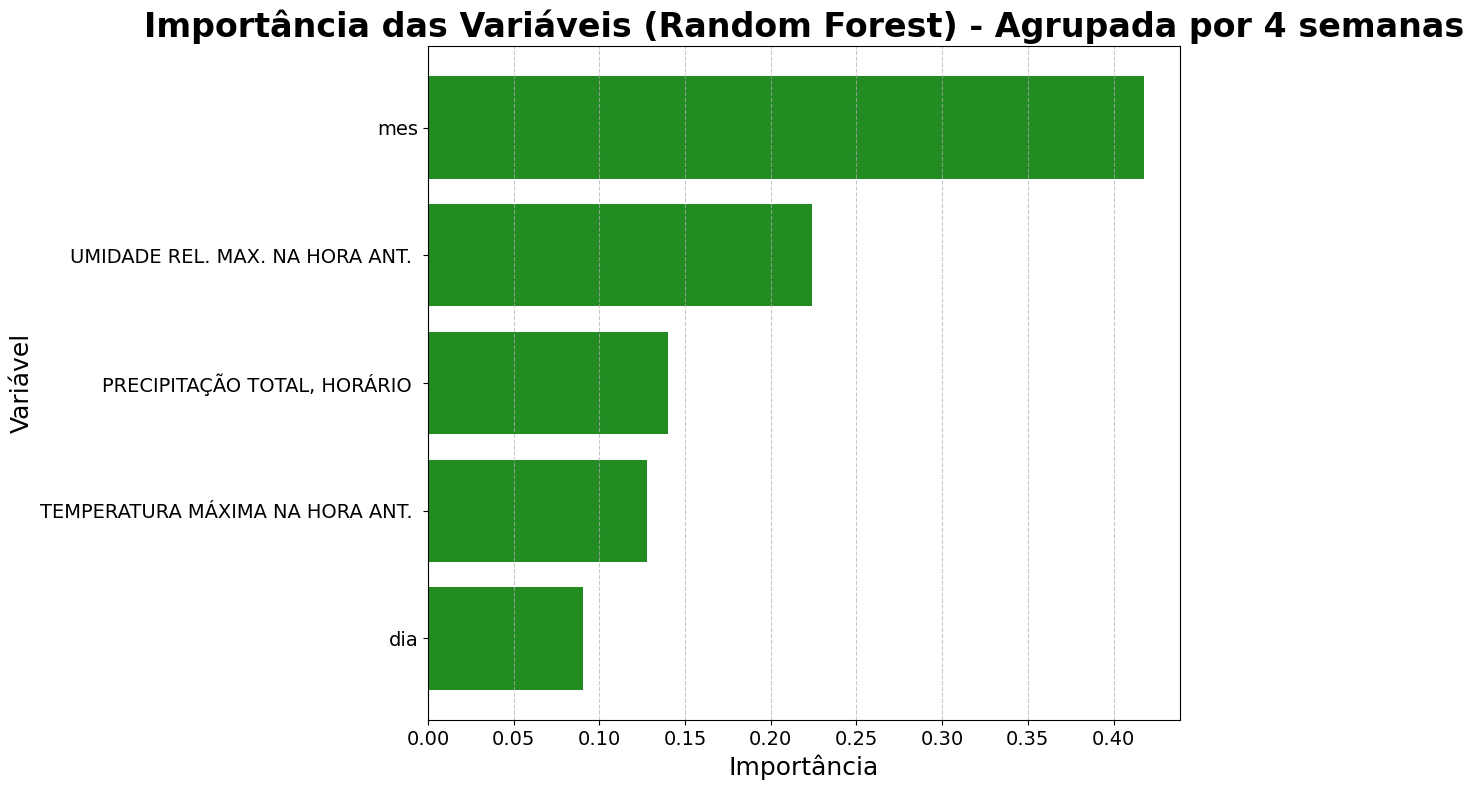

In [ ]:
importances = random_forest.feature_importances_
df = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
df['Variável_base'] = df['Variável'].str.extract(r'(^[^\(_]+)')
df_grouped = df.groupby('Variável_base')['Importância'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Importância', ascending=True)
plt.figure(figsize=(12, 8))
plt.barh(df_grouped['Variável_base'], df_grouped['Importância'], color='forestgreen')
plt.title('Importância das Variáveis (Random Forest) - Agrupada por 4 semanas', fontsize=24, weight='bold')
plt.xlabel('Importância', fontsize=18)
plt.ylabel('Variável', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig("./output/importancia_random_forest_banner.png", dpi=300, bbox_inches='tight')
plt.show()
